In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Overview the DataSet

64


(-0.5, 63.5, 63.5, -0.5)

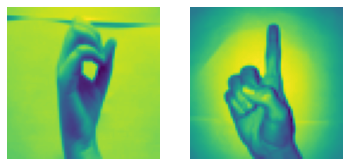

In [18]:
#data load

x_1 = np.load('data/X.npy')
y_1 = np.load('data/Y.npy')

print(len(x_1[260]))
plt.subplot(1,2,1)
plt.imshow(x_1[206])
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_1[900])
plt.axis('off')

In [3]:
x = np.concatenate((x_1[204:409], x_1[822:1027]), axis = 0)# 205개씩 사용
z = np.zeros(205)
o = np.ones(205)
y = np.concatenate((z,o), axis=0).reshape(x.shape[0],1) # 독립변수로 사용 

print("x shape : ", x.shape)
print("y shape : ", y.shape)

x shape :  (410, 64, 64)
y shape :  (410, 1)


In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [7]:
#train , test set 분리 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15, 
                                                    random_state=42)

number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]


In [8]:
#차원 변경 
x_train_flattern = x_train.reshape(number_of_train, x_train.shape[1]*x_train.shape[2])
x_test_flattern = x_test.reshape(number_of_test, x_test.shape[1]*x_test.shape[2])
print(x_train_flattern.shape, x_test_flattern.shape)

(348, 4096) (62, 4096)


In [9]:
#전치행렬 : 행과 열을 바꾼 행렬
x_train = x_train_flattern.T
x_train.shape

x_test = x_test_flattern.T
x_test.shape

y_train = y_train.T
y_test = y_test.T

## logistic Regression 


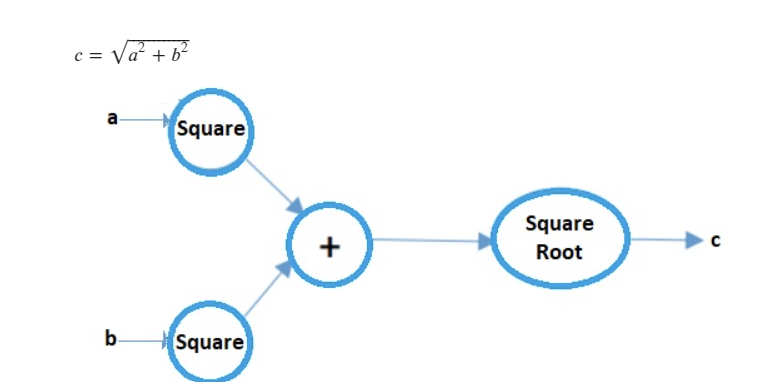
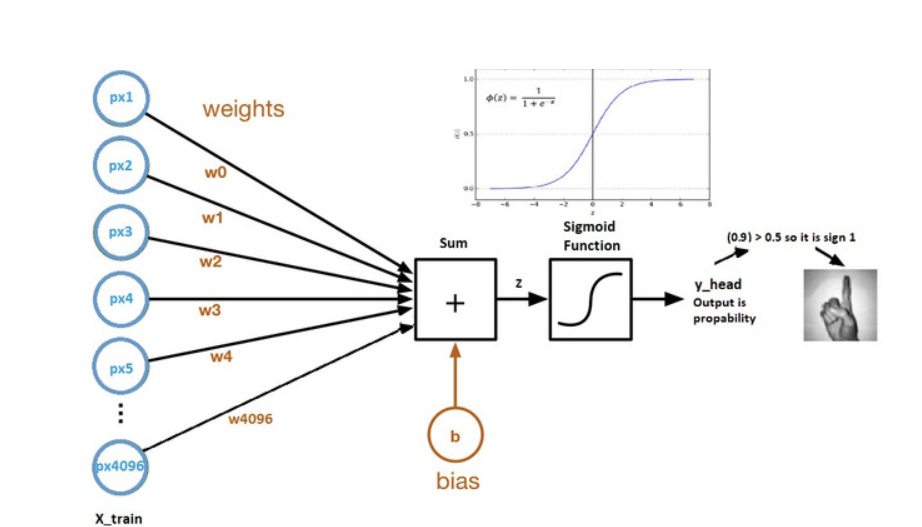

In [11]:
#forward propagation 
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter

result = dummy(3)


def initialize_weight_and_bias(dimension):
    w = np.full((dimension, 1), 0.01) #4096개가 dimension으로 들어감 , bias : 0.01 
    b =0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.e**(-z))
    return y_head

sigmoid(0)

0.5

In [12]:
def forward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train)+b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = np.sum(loss)/x_train.shape[1]
    return cost

In [13]:
w, b = initialize_weight_and_bias(4096)
cost = forward_propagation(w, b, x_train, y_train)
print(cost)

14.014222401929988


In [14]:
def forward_backward_propagation(w ,b ,x_train, y_train):
    z = np.dot(w.T , x_train)+b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = np.sum(loss)/x_train.shape[1]
    print(cost)
    
    #backward propagation
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight":derivative_weight, "derivative_bias":derivative_bias }
    return cost , gradients

In [15]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion): #epochs = number_of_iterarion
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

14.014222401929988
Cost after iteration 0: 14.014222
9.627488642297356
5.240854119000167
1.0168521935097188
2.255953010303203
2.197458290194129
2.099012559755202
2.271594827182482
1.9919722248523357
2.3041564015083944
1.918534888899188
Cost after iteration 10: 1.918535
2.3109317506156994
1.86687297909863
2.302060759960308
1.828651008689329
2.2838811112970614
1.7984540620591256
2.2601658454991496
1.7729962813800377
2.23308175974368
1.750364974345296
Cost after iteration 20: 1.750365
2.2038516752212636
1.729463371751124
2.173167221974387
1.7096547595654616
2.1414296184237736
1.6905528339657534
2.1088843707211935
1.6719040477432945
2.075694397762993
1.6535238227860232
Cost after iteration 30: 1.653524
2.041978616098427
1.635263092604137
2.007831560423102
1.6169915126976868
1.973332767169742
1.5985896554369845
1.938550738417721
1.5799459410941248
1.9035441254688645
1.5609559755938174
Cost after iteration 40: 1.560956
1.8683615770564868
1.541523020070652
1.833041048787551
1.5215588917311946

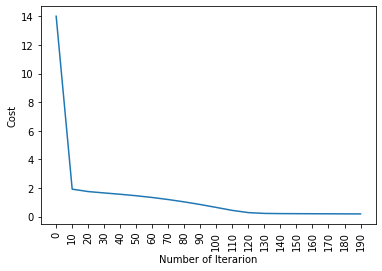

In [139]:
parameters, gradients, cost_list = update(w, b, x_train, y_train, 
                                          learning_rate = 0.009,
                                          number_of_iterarion = 200)

In [140]:
# prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

In [141]:
predict(parameters["weight"],parameters["bias"],x_test)

array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
        1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
        1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [19]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weight_and_bias(dimension)
    
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

14.014222401929988
Cost after iteration 0: 14.014222
9.140081693931261
4.266205301126091
0.869611162147216
2.1461958243990216
2.6310512382435762
2.337129506388679
2.4223533227717557
2.463056199812907
2.259250709051679
2.544689320348448
Cost after iteration 10: 2.544689
2.1327431978826668
2.592159600957865
2.0365660125974516
2.6130747467802875
1.9647290449867316
2.6141047424057957
1.911363190276093
2.6009199827506237
1.8712525069172914
2.577950409665772
Cost after iteration 20: 2.577950
1.84024394414403
2.5483920504006035
1.8153093157993667
2.514420336748676
1.7943675956206617
2.4774653772737536
1.7760325834849828
2.4384555105077337
1.7593851578611757
2.397998654969697
Cost after iteration 30: 2.397999
1.743802691359428
2.3565048687150876
1.7288436444366142
2.3142641926542495
1.7141744105300436
2.2714937930157455
1.6995252607341178
2.228365170086213
1.684665219525123
2.1850188570178917
Cost after iteration 40: 2.185019
1.6693888353430193
2.1415714710690805
1.6535102181368504
2.098118240

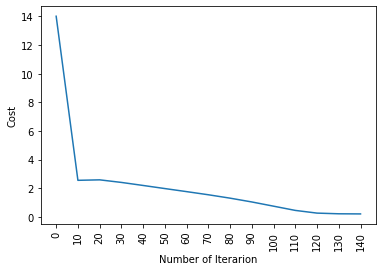

NameError: name 'predict' is not defined

In [20]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

In [21]:
#sklearn 이용

from sklearn import linear_model 
logreg = linear_model.LogisticRegression(random_state=42, max_iter=150)

print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
# print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 


In [22]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [23]:
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

In [24]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [25]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):
    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [26]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    return parameters

In [27]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

Cost after iteration 0: 0.388843
Cost after iteration 100: 0.361967
Cost after iteration 200: 0.350254
Cost after iteration 300: 0.345002
Cost after iteration 400: 0.342308
Cost after iteration 500: 0.335418
Cost after iteration 600: 0.316496
Cost after iteration 700: 0.288701
Cost after iteration 800: 0.252895
Cost after iteration 900: 0.213986
Cost after iteration 1000: 0.151427
Cost after iteration 1100: 0.153640
Cost after iteration 1200: 0.137890
Cost after iteration 1300: 0.122511
Cost after iteration 1400: 0.109981
Cost after iteration 1500: 0.099403
Cost after iteration 1600: 0.090233
Cost after iteration 1700: 0.082236
Cost after iteration 1800: 0.075361
Cost after iteration 1900: 0.069584
Cost after iteration 2000: 0.064743
Cost after iteration 2100: 0.060598
Cost after iteration 2200: 0.056906
Cost after iteration 2300: 0.053431
Cost after iteration 2400: 0.049978


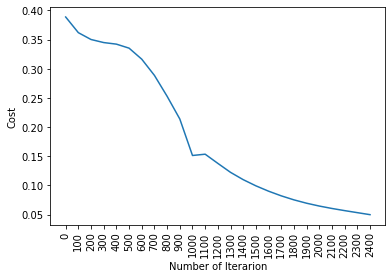

train accuracy: 99.13793103448276 %
test accuracy: 95.16129032258064 %


In [28]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)
    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

In [156]:
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100
8/8 [==============================] - 0s 998us/step - loss: 0.6924 - accuracy: 0.5283
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5183
Epoch 3/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.5225
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5437
Epoch 5/100
8/8 [==============================] - 0s 997us/step - loss: 0.6782 - accuracy: 0.5650
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.5745
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.5491
Epoch 8/100
8/8 [==============================] - 0s 997us/step - loss: 0.6668 - accuracy: 0.5333
Epoch 9/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6560 - accuracy: 0.5331
Epoch 10/100
8/8 [==============================] - 0s 997us/step - loss: 0.6401 - accuracy: 0.5466
Epoch 11/100
8/8 [===

8/8 [==============================] - 0s 855us/step - loss: 0.6922 - accuracy: 0.5223
Epoch 65/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.4843
Epoch 66/100
8/8 [==============================] - 0s 712us/step - loss: 0.6936 - accuracy: 0.5004
Epoch 67/100
8/8 [==============================] - 0s 997us/step - loss: 0.6927 - accuracy: 0.5145
Epoch 68/100
8/8 [==============================] - 0s 855us/step - loss: 0.6903 - accuracy: 0.5512
Epoch 69/100
8/8 [==============================] - 0s 855us/step - loss: 0.6935 - accuracy: 0.5030
Epoch 70/100
8/8 [==============================] - 0s 855us/step - loss: 0.6929 - accuracy: 0.5119
Epoch 71/100
8/8 [==============================] - 0s 855us/step - loss: 0.6930 - accuracy: 0.5105
Epoch 72/100
8/8 [==============================] - 0s 997us/step - loss: 0.6933 - accuracy: 0.5065
Epoch 73/100
8/8 [==============================] - 0s 855us/step - loss: 0.6904 - accuracy: 0.5471
Epoch 74/100
8/

퍼셉트론 -> ann -> dnn -> ... 으로 변경되는 과정 이해로 복습! 

In [158]:
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()